# 🎯 Run the CSPOT Prediction Algorithm on new images

**Download the [executable notebook](https://github.com/nirmallab/cspot/blob/main/docs/Tutorials/notebooks/RunCSPOTAlgorithm.ipynb) and [trained models](https://doi.org/10.7910/DVN/C45JWT).**  

For the purpose of this tutorial, we will use the `manuscriptModels` as opposed to the models that you trained in the previous tutorial.
    
Please keep in mind that the sample data is used for demonstration purposes only and has been simplified and reduced in size. It is solely intended for educational purposes on how to execute `cspot` and will not yeild any meaningful results.


**Running the CSPOT Prediction Algorithm involves the following steps:**
- Run the `csPredict` function on a new image. It will produce an image with probability masks
- Run the `generateCSScore` function on the probability masks to generate the `cspotScores`
- Run the `csObject` to create an anndata object with the `cspotScores` and pre-computed `single-cell table`
- Lastly, run `cspot`  on the csObject
  
**Note: To make things easy, all of the above steps can be run with a single command `csPipeline`.**  
Typically, in production settings, `csPipeline` would be utilized, whereas step-by-step analysis would be employed for troubleshooting, model validation, and similar tasks that necessitate greater granularity or control.

<hr>

## Single command execution of the entire CSPOT Prediction Algorithm using the `csPipeline` function

In [2]:
# import packages in jupyter notebook (not needed for command line interface users)
import cspot as cs

In [3]:
# Path to all the files that are necessary files for running the CSPOT Prediction Algorithm (broken down based on sub functions)
projectDir = '/Users/aj/Documents/cspotExampleData'

# gatorPredict related paths
imagePath = projectDir + '/image/exampleImage.tif'
markerChannelMapPath = projectDir + '/markers.csv'
csModelPath = projectDir + '/manuscriptModels/'

# Generate generateGatorScore related paths
segmentationPath = projectDir + '/segmentation/exampleSegmentationMask.tif'

# gatorObject related paths
spatialTablePath = projectDir + '/quantification/exampleSpatialTable.csv'


In [6]:
# Run the pipeline (For function specific parameters, check the documentation)
cs.csPipeline(   
                    # parameters for gatorPredict function
                    imagePath=imagePath,
                    csModelPath=csModelPath,
                    markerChannelMapPath=markerChannelMapPath,

                    # parameters for generateGatorScore function
                    segmentationMaskPath=segmentationPath,

                    # parameters for gatorObject function
                    spatialTablePath=spatialTablePath,

                    # parameters to run gator function
                    # ..

                    # common parameters
                    verbose=False,
                    projectDir=projectDir)


loading data
Instructions for updating:
Colocations handled automatically by placer.
loading data
loading data
INFO:tensorflow:Restoring parameters from /Users/aj/Documents/cspotExampleData/manuscriptModels/ECAD/model.ckpt
Model restored.


/Users/aj/miniconda3/envs/cspot/lib/python3.9/site-packages/cspot/UNet.py:137: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  bn = tf.nn.leaky_relu(tf.layers.batch_normalization(c00+shortcut, training=UNet2D.tfTraining))
/Users/aj/miniconda3/envs/cspot/lib/python3.9/site-packages/cspot/UNet.py:159: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  lbn = tf.nn.leaky_relu(tf.layers.batch_normalization(
/Users/aj/miniconda3/envs/cspot/lib/python3.9/site-packages/cspot/UNet.py

Inference...
loading data
loading data
loading data
INFO:tensorflow:Restoring parameters from /Users/aj/Documents/cspotExampleData/manuscriptModels/CD3D/model.ckpt
Model restored.
Inference...


/Users/aj/miniconda3/envs/cspot/lib/python3.9/site-packages/cspot/cspot.py:383: RuntimeWarning: invalid value encountered in divide
  below_midpoint = (below_midpoint - min_below) / range_below


**Same function if the user wants to run it via Command Line Interface**
```
python csPipeline.py \
                --imagePath /Users/aj/Documents/cspotExampleData/image/exampleImage.tif \
                --csModelPath /Users/aj/Documents/cspotExampleData/CSPOT/cspotModel/ \
                --markerChannelMapPath /Users/aj/Documents/cspotExampleData/markers.csv \
                --segmentationMaskPath /Users/aj/Documents/cspotExampleData/segmentation/exampleSegmentationMask.tif \
                --spatialTablePath /Users/aj/Documents/cspotExampleData/quantification/exampleSpatialTable.csv \
                --projectDir /Users/aj/Documents/cspotExampleData
```

Head over to `CSPOT/cspotOutput` to view results

## Visualize the results

Let us visualize the marker postivity of three markers using a helper plotting function provided within CSPOT.

/Users/aj/miniconda3/envs/cspot/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


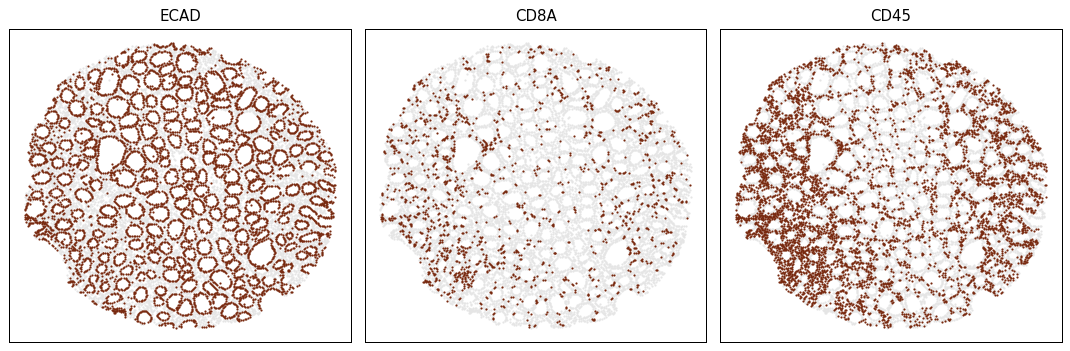

In [11]:
csObject = projectDir + '/CSPOT/cspotOutput/exampleImage_cspotPredict.ome.h5ad'

# Plot image to console
cs.scatterPlot(csObject,
            markers=['ECAD', 'CD8A', 'CD45'],
            poscellsColor='#78290f',
            negcellsColor='#e5e5e5',
            s=3,
            ncols=3,
            dpi=90,
            figsize=(4, 4),
            outputDir=None,
            outputFileName='cspotplot.png')

<hr>

## Step by step execution of the CSPOT Prediction Algorithm (in contrast to pipeline)

In [13]:
# Path to all the files that are necessary files for running csPredict
projectDir = '/Users/aj/Documents/cspotExampleData'

# csPredict related paths
imagePath = projectDir + '/image/exampleImage.tif'
markerChannelMapPath = projectDir + '/markers.csv'
csModelPath = projectDir + '/manuscriptModels/'

## Step-1: Apply the generated Models on the Image of interest (Pixel Level)

The function `csPredict` is employed to make predictions about the expression of a specified marker on cells in new images using the models generated by `csTrain`. This calculation is done at the pixel level, resulting in an output image where the number of channels corresponds to the number of models applied to the input image. The parameter `markerChannelMapPath` is used to associate the image channel number with the relevant model to be applied.

In [15]:
cs.csPredict( imagePath=imagePath,
                 csModelPath=csModelPath,
                 projectDir=projectDir,
                 markerChannelMapPath=markerChannelMapPath, 
                 markerColumnName='marker', 
                 channelColumnName='channel', 
                 modelColumnName='cspotmodel')

Running CSPOT model ECAD on channel 2 corresponding to marker ECAD
loading data
loading data
loading data
INFO:tensorflow:Restoring parameters from /Users/aj/Documents/cspotExampleData/manuscriptModels/ECAD/model.ckpt
Model restored.


/Users/aj/miniconda3/envs/cspot/lib/python3.9/site-packages/cspot/UNet.py:137: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  bn = tf.nn.leaky_relu(tf.layers.batch_normalization(c00+shortcut, training=UNet2D.tfTraining))
/Users/aj/miniconda3/envs/cspot/lib/python3.9/site-packages/cspot/UNet.py:159: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  lbn = tf.nn.leaky_relu(tf.layers.batch_normalization(
/Users/aj/miniconda3/envs/cspot/lib/python3.9/site-packages/cspot/UNet.py

Inference...
Running CSPOT model CD3D on channel 5 corresponding to marker CD3D
loading data
loading data
loading data
INFO:tensorflow:Restoring parameters from /Users/aj/Documents/cspotExampleData/manuscriptModels/CD3D/model.ckpt
Model restored.
Inference...


**Same function if the user wants to run it via Command Line Interface**
```
python csPredict.py \
            --imagePath /Users/aj/Documents/cspotExampleData/image/exampleImage.tif \
            --csModelPath /Users/aj/Documents/cspotExampleData/manuscriptModels \
            --projectDir /Users/aj/Documents/cspotExampleData \
            --markerChannelMapPath /Users/aj/Documents/cspotExampleData/markers.csv
```

## Step-2: Calculate the cspotScore (Single-cell Level)

After calculating pixel-level probability scores, the next step is to aggregate them to the single-cell level. This can be done by computing the mean or median probability scores using pre-computed segmentation masks. The marker names, if available, should already be included in the probabilityMask image. If the marker names are lost due to file manipulation, the user can provide them through the markerNames parameter.

In [16]:
# Path to all the files that are necessary files for running generateCSScore
segmentationPath = projectDir + '/segmentation/exampleSegmentationMask.tif'
probabilityMaskPath = projectDir + '/CSPOT/csPredict/exampleImage_cspotPredict.ome.tif'


In [17]:
cs.generateCSScore(probabilityMaskPath=probabilityMaskPath,
                      segmentationMaskPath=segmentationPath,
                      feature='median',
                      projectDir=projectDir)


Quantifying the probability masks
csScore is ready, head over to/Users/aj/Documents/cspotExampleData/CSPOT/csScore" to view results


**Same function if the user wants to run it via Command Line Interface**
```
python generateCSScore.py \
            --probabilityMaskPath /Users/aj/Documents/cspotExampleData/CSPOT/csPredict/exampleImage_cspotPredict.ome.tif \
            --segmentationMaskPath /Users/aj/Documents/cspotExampleData/segmentation/exampleSegmentationMask.tif \
            --projectDir /Users/aj/Documents/cspotExampleData
```

If you head over to `CSPOT/csScore/`, you will find the `.csv` file with the csScores for every cell.

## Step-3: Create a CSPOT object

We'll use the anndata framework to create a cspot object to store all information in one file, making it easier to keep track of intermediate files generated in subsequent steps.  This helps streamline the data analysis process and reduces the risk of losing or misplacing information.

In [18]:
# Path to all the files that are necessary files for running csObject function
segmentationPath = projectDir + '/segmentation/exampleSegmentationMask.tif'
csScorePath = projectDir + '/CSPOT/csScore/exampleImage_cspotPredict.ome.csv'


In [19]:
# please note that there are a number of defaults in the below function that assumes certain structure within the spatialTable.
# Please confirm it is similar with user data or modifiy the parameters accordingly
# check out the documentation for further details
adata = cs.csObject (spatialTablePath=spatialTablePath,
                        csScorePath=csScorePath,
                        CellId='CellID',
                        uniqueCellId=True,
                        split='X_centroid',
                        removeDNA=True,
                        remove_string_from_name=None,
                        log=True,
                        dropMarkers=None,
                        projectDir=projectDir)


Loading exampleSpatialTable.csv
CSPOT Object has been created, head over to/Users/aj/Documents/cspotExampleData/CSPOT/csObject" to view results


**Same function if the user wants to run it via Command Line Interface**
```
python csObject.py \
            --spatialTablePath /Users/aj/Documents/cspotExampleData/quantification/exampleSpatialTable.csv \
            --csScorePath /Users/aj/Documents/cspotExampleData/CSPOT/csScore/exampleImage_cspotPredict.ome.csv \
            --projectDir /Users/aj/Documents/cspotExampleData
```

If you had provided `projectDir` the object would be stored in `CSPOT/csObject/`, else, the object will be returned to memory

## Step-4: Run the final CSPOT Algorithm

The `cspot` algorithm is ready to run after pre-processing. To get optimal results, consider adjusting the following parameters:
  
1. The `minAbundance` parameter determines the minimum percentage of a marker's abundance to consider it a failure.
2. It is suggested to drop background markers with the `dropMarkers` option as they can interfere with classifiers.
3. `RobustScale`: Scaling the data before training the classifier model has been shown to improve results. However, in our experience a simple log transformation was found to be work best. 

In [20]:
# Path to all the files that are necessary files for running cspot function
csObject = projectDir + '/CSPOT/csObject/exampleImage_cspotPredict.ome.h5ad'


In [21]:
adata = cs.cspot ( csObject=csObject,
                    csScore='csScore',
                    minAbundance=0.005,
                    percentiles=[1, 20, 80, 99],
                    dropMarkers = None,
                    RobustScale=False,
                    log=True,
                    x_coordinate='X_centroid',
                    y_coordinate='Y_centroid',
                    imageid='imageid',
                    random_state=0,
                    rescaleMethod='sigmoid',
                    label='cspotOutput',
                    verbose=False,
                   projectDir=projectDir)


**Same function if the user wants to run it via Command Line Interface**
```
python cspot.py \
            --csObject /Users/aj/Documents/cspotExampleData/CSPOT/csObject/exampleImage_cspotPredict.ome.h5ad \
            --projectDir /Users/aj/Documents/cspotExampleData
```

If `projectDir` is provided, modified anndata object with results (stored in `adata.uns['cspotOutput']`) will be saved in `CSPOT/cspotOutput/`. The cspot-scaled data (stored in `adata.X`) considers cells above 0.5 as positive and below 0.5 as negative for the marker.

## Step-5: Merge multiple CSPOT objects (optional)

Use `mergecspotObject` to combine multiple csObjects into a dataset for analysis when multiple images need to be analyzed.
  
Note that merging csObjects requires merging multiple sections, not simple concatenation. Use parameters to specify which parts of the csObjects to merge.

In [7]:
# set the working directory & set paths to the example data
csObjects = [projectDir + '/CSPOT/cspotOutput/exampleImage_cspotPredict.ome.h5ad',
            projectDir + '/CSPOT/cspotOutput/exampleImage_cspotPredict.ome.h5ad']

In [8]:
# For this tutorial, supply the same gatorObject twice for merging, but multiple gatorObjects can be merged in ideal conditions.
adata = cs.mergecsObject ( csObjects=csObjects,
                              fileName='mergedcspotObject',
                              layers=['preProcessed'],
                              uns= ['cspotOutput','csScore'],
                              projectDir=projectDir)


Extracting data
Extracting data from: exampleSpatialTable
Extracting data from: exampleSpatialTable
Given csObjects have been merged, head over to "/Users/aj/Documents/cspotExampleData/CSPOT/mergedcsObject" to view results


/Users/aj/miniconda3/envs/cspot/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


**Same function if the user wants to run it via Command Line Interface**
```
python mergecsObject.py \
            --csObjects /Users/aj/Documents/cspotExampleData/CSPOT/cspotOutput/exampleImage_cspotPredict.ome.h5ad /Users/aj/Documents/cspotExampleData/CSPOT/cspotOutput/exampleImage_cspotPredict.ome.h5ad \
            --projectDir /Users/aj/Documents/cspotExampleData
```

If `projectDir` is provided, modified anndata object with results will be saved in `CSPOT/mergedcsObject/`.

In [ ]:
# this tutorial ends here. Move to the Phenotyping cells Tutorial